# 0601 공유

1) seoul.csv 데이터 확인   
2) 데이터 관련 차트 5개 뽑아오기   
3) 데이터 분석 후 어떤 것을 제거 등의 처리가 필요한지 생각해오기   
4) 내가 분석한 데이터와 차트들로 어떤 예측모델을 만들면 좋을지 생각해오기(logistic regression, knn, random forest, adaboost, xgb, lgbm, catboost 등)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('seoul.csv', encoding='cp949')
df2=pd.read_csv('역별 시간대별 노인 승하차(+지역이름 추가).csv', encoding='cp949')

In [3]:
df1.columns

Index(['Unnamed: 0', '자치구', '승차', '하차', '승하차', '13시', '14시', '15시', '16시',
       '노인인구', '양로시설수', '양로시설정원', '양로시설현원', '양로시설종사자수', '요양시설수', '요양시설정원',
       '요양시설현원', '요양시설종사자수', '노인복지시설수', '노인복지종사자수', '경로당', '노인교실', '노인일자리시설수',
       '노인일자리종사자수'],
      dtype='object')

In [4]:
df2.columns

Index(['호선명', '역번호', '역명', '지역', '승하차구분',
       '승하차인원수 / 전체승객유형 / 불필요한 열로 간주하는게 좋지 않을까 생각이 듬 / 자료 출처 알 수 없음',
       '06시간대이전 / 2022-07-01 기준 / 우대권(노인)', '06-07시간대', '07-08시간대', '08-09시간대',
       '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
       '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대', '20-21시간대',
       '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후', '총인원합'],
      dtype='object')

In [5]:
df1 = df1.drop(['Unnamed: 0', '승차', '하차', '13시', '14시', '15시', '16시', '노인일자리시설수', '노인일자리종사자수'], axis=1)

- 맨 처음 인덱스 열 제거
- 승하차=승차+하차 이기에 승차, 하차 제거
- 시간대 의미있나? 없어보이기에 13시~16시 제거
- 노인일자리시설, 노인자리종사자수 필요한가? 불필요 생각

In [6]:
df1.columns

Index(['자치구', '승하차', '노인인구', '양로시설수', '양로시설정원', '양로시설현원', '양로시설종사자수', '요양시설수',
       '요양시설정원', '요양시설현원', '요양시설종사자수', '노인복지시설수', '노인복지종사자수', '경로당', '노인교실'],
      dtype='object')

In [7]:
df2 = df2.rename(columns={'지역':'자치구'})
df2 = df2.rename(columns={'승하차인원수 / 전체승객유형 / 불필요한 열로 간주하는게 좋지 않을까 생각이 듬 / 자료 출처 알 수 없음' : '승하차'})

# 1. seoul.csv

In [8]:
df1

,자치구,승하차,노인인구,양로시설수,양로시설정원,양로시설현원,양로시설종사자수,요양시설수,요양시설정원,요양시설현원,요양시설종사자수,노인복지시설수,노인복지종사자수,경로당,노인교실
0,송파구,15540698,"93,309",1,12,12,5,8,658,614,441,3,48,172,17
1,강남구,17425049,"74,959",0,0,0,0,4,215,63,48,6,94,167,22
2,강동구,11581597,"69,903",1,124,84,24,8,495,372,258,3,139,121,10
3,서초구,11696077,"60,072",0,0,0,0,4,322,305,215,4,130,141,6
4,노원구,12334867,"85,420",2,124,81,31,11,884,808,533,3,125,243,13
5,강서구,8317204,"88,733",1,25,24,17,18,"1,017",933,619,5,97,218,25
6,영등포구,6448615,"60,663",0,0,0,0,1,118,116,87,1,27,174,27
7,관악구,9236593,"78,430",0,0,0,0,10,435,405,296,1,33,114,19
8,성북구,6467009,"73,613",0,0,0,0,16,715,613,400,6,110,175,9
9,은평구,12361204,"85,010",1,25,18,7,15,"1,070",986,639,7,170,154,17


# 1-1 분포 시각화

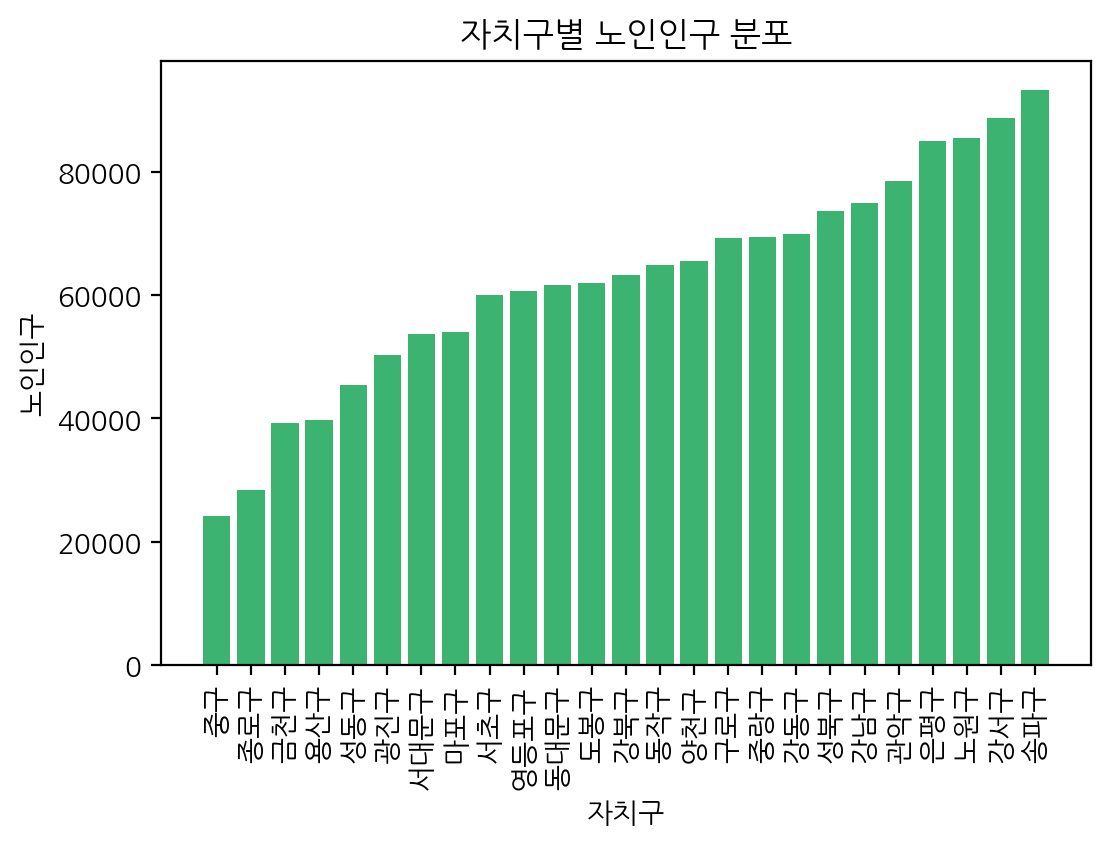

In [23]:
df1_v1 = df1.sort_values(by='노인인구')

# 막대 그래프를 그리기 위해 데이터를 추출
x = df1_v1['자치구']  # 자치구
y = df1_v1['노인인구']  # 노인인구

# 그래프 생성
plt.figure(dpi=200)  # 그래프 크기 설정
plt.bar(x, y, color='mediumseagreen')  # 막대 그래프 생성
plt.xlabel('자치구')  # x축 레이블 설정
plt.ylabel('노인인구')  # y축 레이블 설정
plt.title('자치구별 노인인구 분포')  # 그래프 제목 설정

# x축 레이블을 90도로 회전하여 표시 (글자 겹침 방지)
plt.xticks(rotation=90)

# 그래프 출력
plt.show()

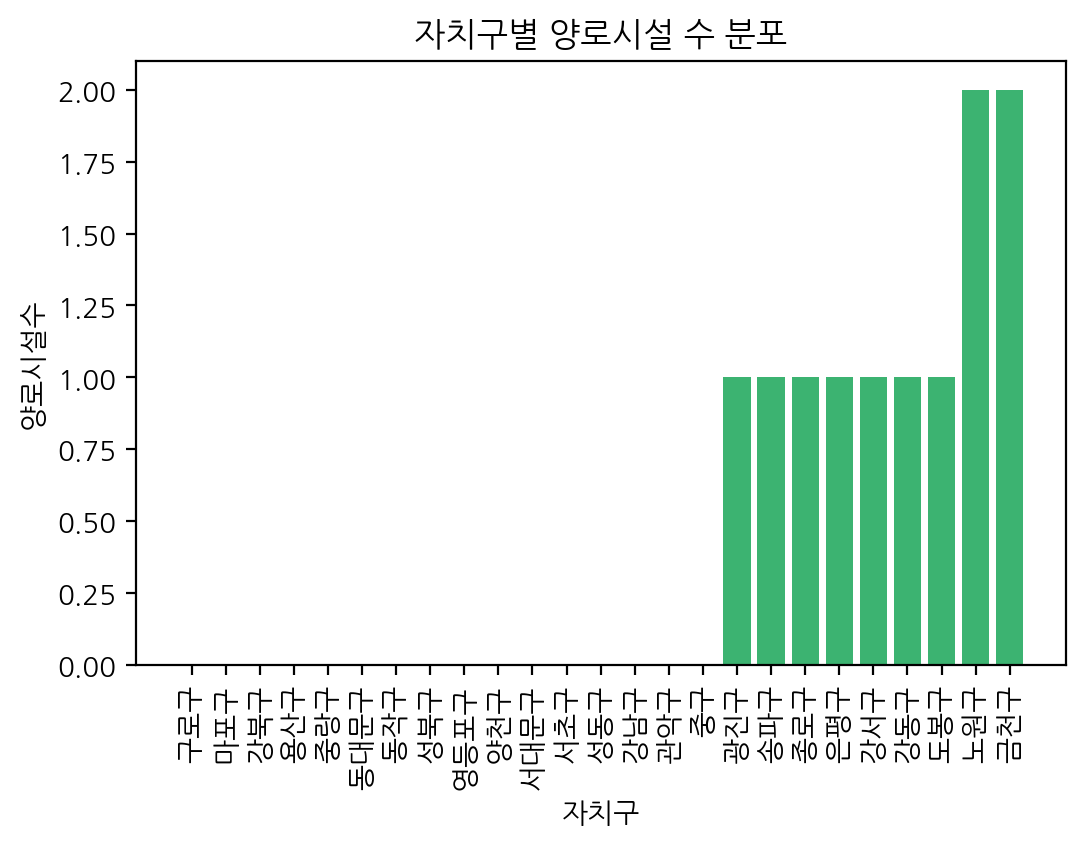

In [24]:
df1_v2 = df1.sort_values(by='양로시설수')

# 막대 그래프를 그리기 위해 데이터를 추출
x = df1_v2['자치구']  # 자치구
y = df1_v2['양로시설수']  

# 그래프 생성
plt.figure(dpi=200)  # 그래프 크기 설정
plt.bar(x, y, color='mediumseagreen')  # 막대 그래프 생성
plt.xlabel('자치구')  # x축 레이블 설정
plt.ylabel('양로시설수')  # y축 레이블 설정
plt.title('자치구별 양로시설 수 분포')  # 그래프 제목 설정

# x축 레이블을 90도로 회전하여 표시 (글자 겹침 방지)
plt.xticks(rotation=90)

# 그래프 출력
plt.show()

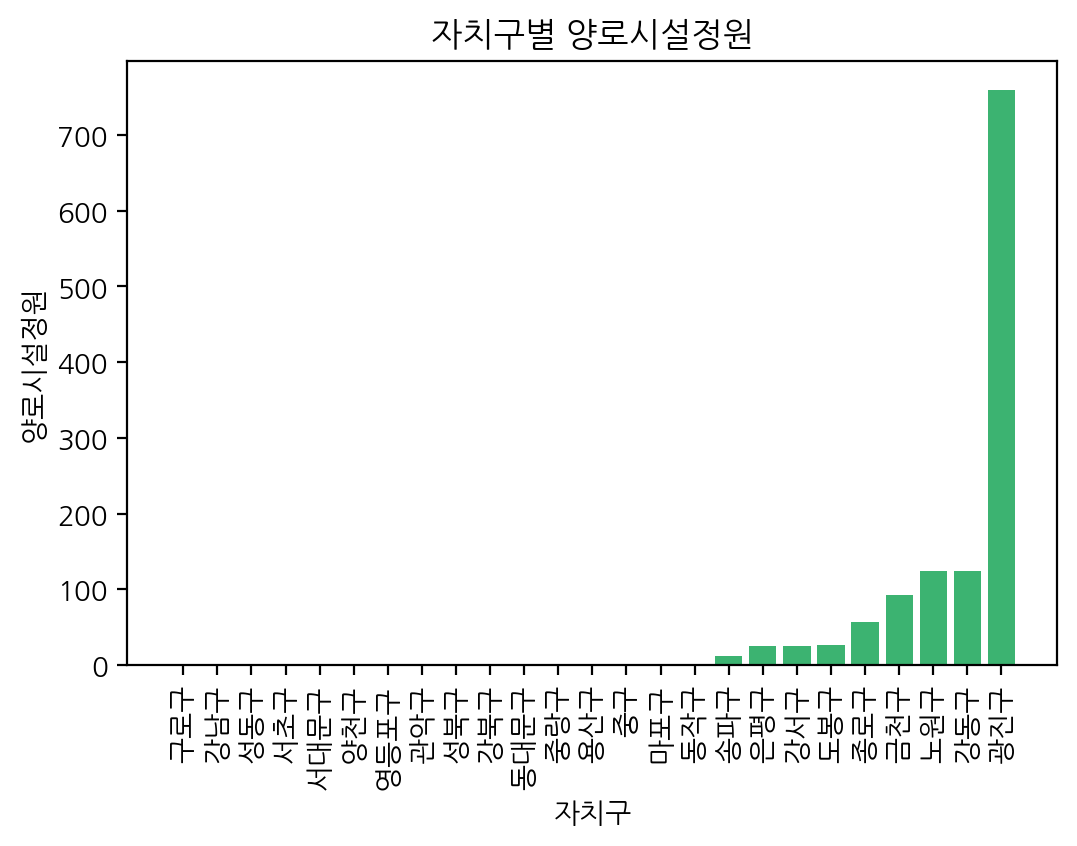

In [25]:
df1_v3 = df1.sort_values(by='양로시설정원')

# 막대 그래프를 그리기 위해 데이터를 추출
x = df1_v3['자치구']  # 자치구
y = df1_v3['양로시설정원']  

# 그래프 생성
plt.figure(dpi=200)  # 그래프 크기 설정
plt.bar(x, y, color='mediumseagreen')  # 막대 그래프 생성
plt.xlabel('자치구')  # x축 레이블 설정
plt.ylabel('양로시설정원')  # y축 레이블 설정
plt.title('자치구별 양로시설정원')  # 그래프 제목 설정

# x축 레이블을 90도로 회전하여 표시 (글자 겹침 방지)
plt.xticks(rotation=90)

# 그래프 출력
plt.show()

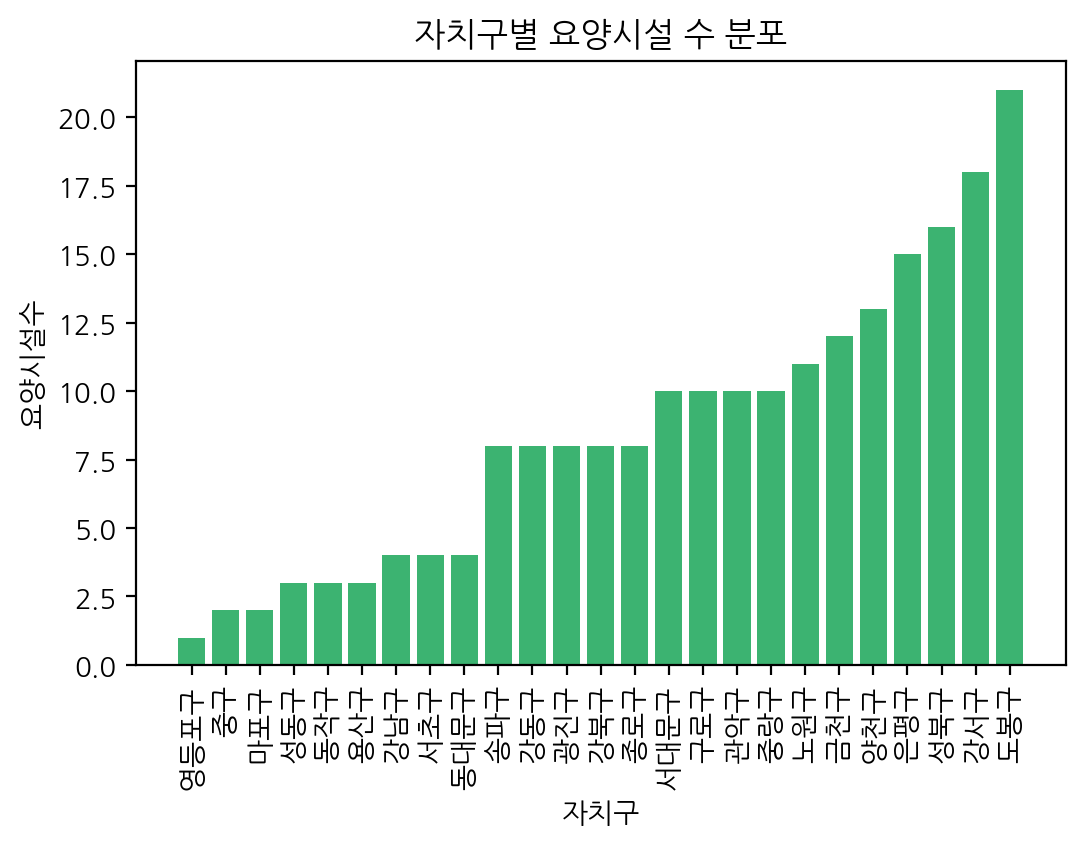

In [26]:
df1_v4 = df1.sort_values(by='요양시설수')

# 막대 그래프를 그리기 위해 데이터를 추출
x = df1_v4['자치구']  # 자치구
y = df1_v4['요양시설수']  

# 그래프 생성
plt.figure(dpi=200)  # 그래프 크기 설정
plt.bar(x, y, color='mediumseagreen')  # 막대 그래프 생성
plt.xlabel('자치구')  # x축 레이블 설정
plt.ylabel('요양시설수')  # y축 레이블 설정
plt.title('자치구별 요양시설 수 분포')  # 그래프 제목 설정

# x축 레이블을 90도로 회전하여 표시 (글자 겹침 방지)
plt.xticks(rotation=90)

# 그래프 출력
plt.show()

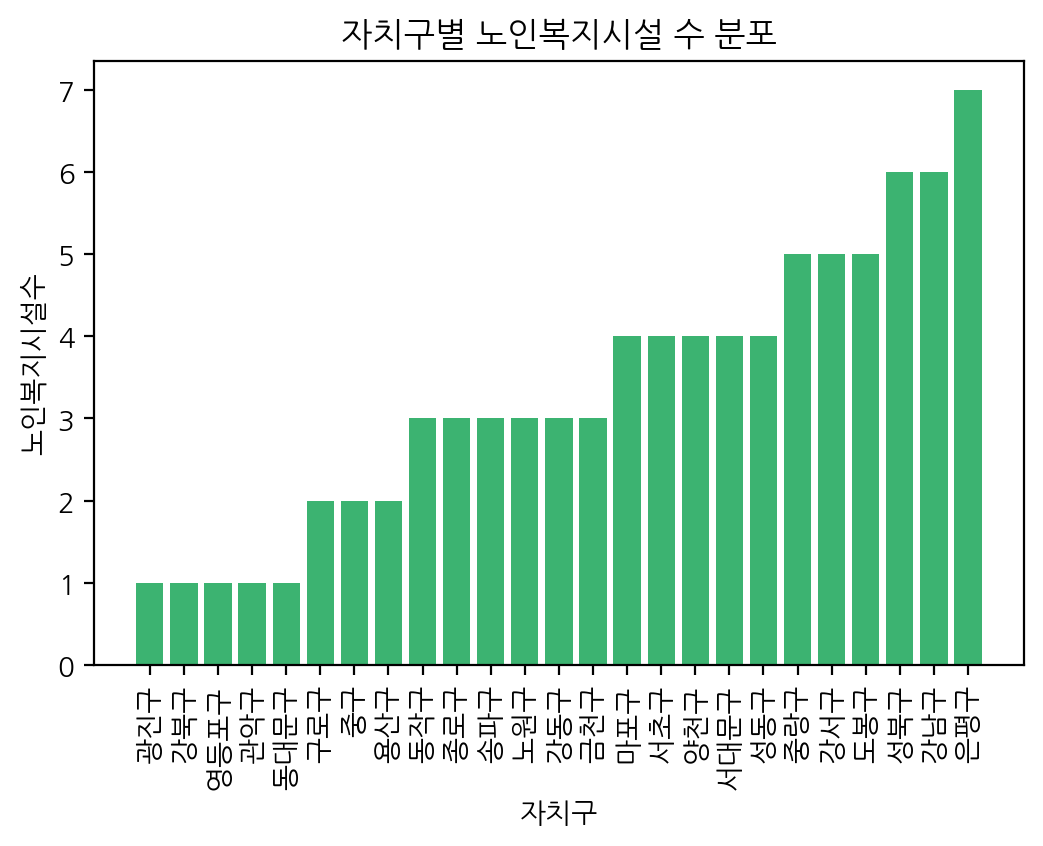

In [27]:
df1_v5 = df1.sort_values(by='노인복지시설수')

# 막대 그래프를 그리기 위해 데이터를 추출
x = df1_v5['자치구']  # 자치구
y = df1_v5['노인복지시설수']  

# 그래프 생성
plt.figure(dpi=200)  # 그래프 크기 설정
plt.bar(x, y, color='mediumseagreen')  # 막대 그래프 생성
plt.xlabel('자치구')  # x축 레이블 설정
plt.ylabel('노인복지시설수')  # y축 레이블 설정
plt.title('자치구별 노인복지시설 수 분포')  # 그래프 제목 설정

# x축 레이블을 90도로 회전하여 표시 (글자 겹침 방지)
plt.xticks(rotation=90)

# 그래프 출력
plt.show()

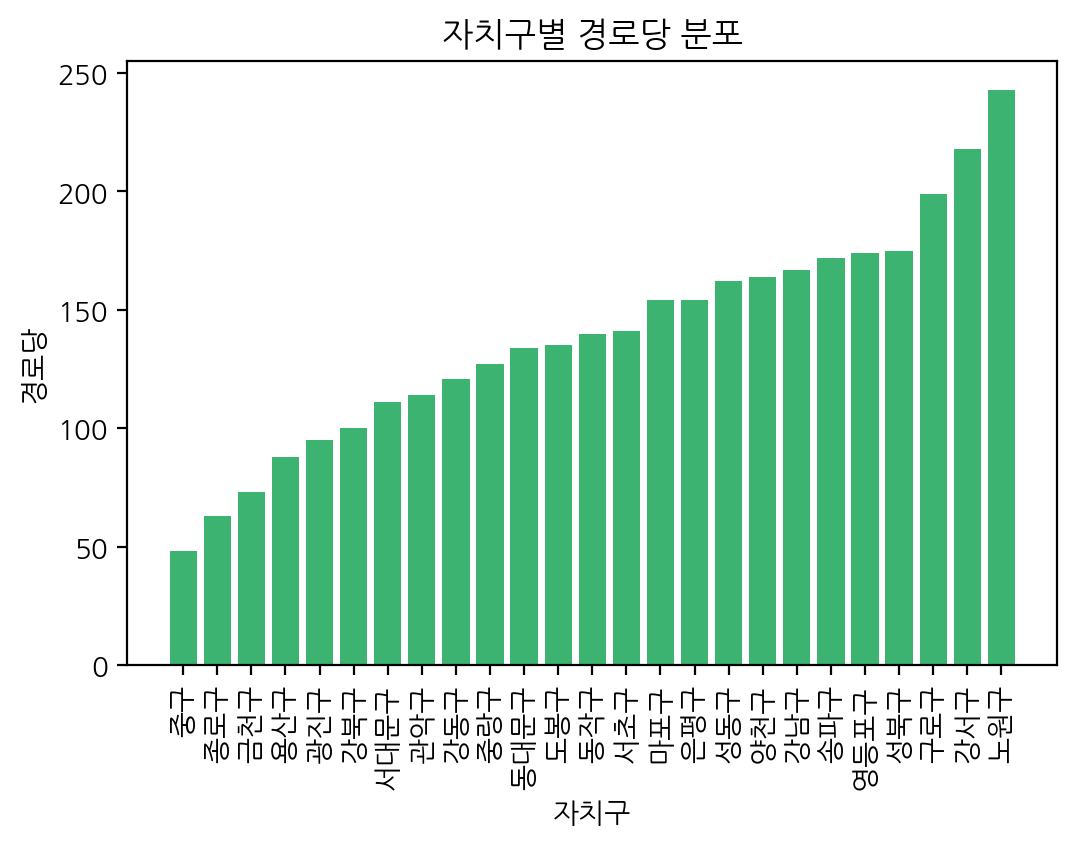

In [28]:
df1_v5 = df1.sort_values(by='경로당')

# 막대 그래프를 그리기 위해 데이터를 추출
x = df1_v5['자치구']  # 자치구
y = df1_v5['경로당']  

# 그래프 생성
plt.figure(dpi=200)  # 그래프 크기 설정
plt.bar(x, y, color='mediumseagreen')  # 막대 그래프 생성
plt.xlabel('자치구')  # x축 레이블 설정
plt.ylabel('경로당')  # y축 레이블 설정
plt.title('자치구별 경로당 분포')  # 그래프 제목 설정

# x축 레이블을 90도로 회전하여 표시 (글자 겹침 방지)
plt.xticks(rotation=90)

# 그래프 출력
plt.show()

# 1-2 상관관계_히트맵

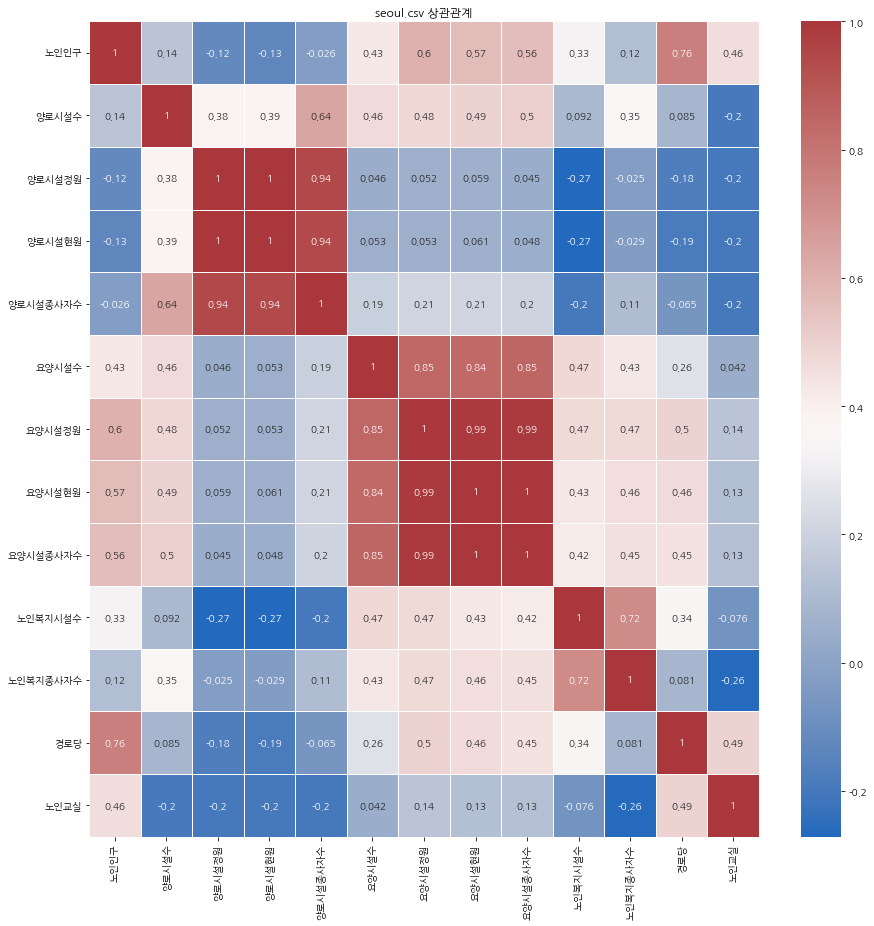

In [29]:
# 분석하고자 하는 열 선택
selected_columns = ['노인인구', '양로시설수', '양로시설정원', '양로시설현원', '양로시설종사자수',
                    '요양시설수', '요양시설정원', '요양시설현원', '요양시설종사자수',
                    '노인복지시설수', '노인복지종사자수', '경로당', '노인교실']

# 선택한 열에 해당하는 데이터 추출
selected_data = df1[selected_columns]

# 숫자형 데이터로 변환
selected_data = selected_data.replace(',', '', regex=True).astype(float)

# 상관 관계 계산
correlation_matrix = selected_data.corr()

# 히트맵 그리기
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', linewidths=0.5)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'
plt.title('seoul.csv 상관관계')
plt.show()

# 1-3 열 간의 상관 계수 출력

In [30]:
# 분석하고자 하는 열 선택
selected_columns = ['노인인구', '양로시설수', '양로시설정원', '양로시설현원', '양로시설종사자수',
                    '요양시설수', '요양시설정원', '요양시설현원', '요양시설종사자수',
                    '노인복지시설수', '노인복지종사자수', '경로당', '노인교실']

# 선택한 열에 해당하는 데이터 추출
selected_data = df1[selected_columns]

# 숫자형 데이터로 변환
selected_data = selected_data.replace(',', '', regex=True).astype(float)

# 상관 관계 계산
correlation_matrix = selected_data.corr()

# 상관 계수 출력
for col in correlation_matrix.columns:
    for index, value in correlation_matrix[col].items():
        if col != index:  # 같은 열 간의 상관 계수는 제외
            print(f"{col}과(와) {index}의 상관 계수: {value}")

노인인구과(와) 양로시설수의 상관 계수: 0.14398309949309984
노인인구과(와) 양로시설정원의 상관 계수: -0.12129300722723649
노인인구과(와) 양로시설현원의 상관 계수: -0.13013486859649118
노인인구과(와) 양로시설종사자수의 상관 계수: -0.025772226610747778
노인인구과(와) 요양시설수의 상관 계수: 0.4274932263381205
노인인구과(와) 요양시설정원의 상관 계수: 0.5996971839794868
노인인구과(와) 요양시설현원의 상관 계수: 0.5665620054097604
노인인구과(와) 요양시설종사자수의 상관 계수: 0.5604057169475508
노인인구과(와) 노인복지시설수의 상관 계수: 0.32908299737922914
노인인구과(와) 노인복지종사자수의 상관 계수: 0.11869693029177691
노인인구과(와) 경로당의 상관 계수: 0.7626405430888832
노인인구과(와) 노인교실의 상관 계수: 0.46183786784216235
양로시설수과(와) 노인인구의 상관 계수: 0.14398309949309984
양로시설수과(와) 양로시설정원의 상관 계수: 0.38280101560157015
양로시설수과(와) 양로시설현원의 상관 계수: 0.3883267329284455
양로시설수과(와) 양로시설종사자수의 상관 계수: 0.6395505374193051
양로시설수과(와) 요양시설수의 상관 계수: 0.4637142907742605
양로시설수과(와) 요양시설정원의 상관 계수: 0.480108878501424
양로시설수과(와) 요양시설현원의 상관 계수: 0.489687487287315
양로시설수과(와) 요양시설종사자수의 상관 계수: 0.504996030310558
양로시설수과(와) 노인복지시설수의 상관 계수: 0.09205218548814992
양로시설수과(와) 노인복지종사자수의 상관 계수: 0.3477007853709498
양로시설수과(와) 경로당의 상관 계수: 0.08488

# 1-4 상위 5개 높은 상관 계수?

In [31]:
import numpy as np

# 분석하고자 하는 열 선택
selected_columns = ['노인인구', '양로시설수', '양로시설정원', '양로시설현원', '양로시설종사자수',
                    '요양시설수', '요양시설정원', '요양시설현원', '요양시설종사자수',
                    '노인복지시설수', '노인복지종사자수', '경로당', '노인교실']

# 선택한 열에 해당하는 데이터 추출
selected_data = df1[selected_columns]

# 숫자형 데이터로 변환
selected_data = selected_data.replace(',', '', regex=True).astype(float)

# 상관 관계 계산
correlation_matrix = selected_data.corr()

# 같은 열 간의 상관 계수 제외
correlation_matrix = correlation_matrix.mask(np.triu(np.ones(correlation_matrix.shape)).astype(bool))

# 높은 상위 5개 상관 계수 추출
correlation_top5 = correlation_matrix.unstack().sort_values(ascending=False)[:5]

print("높은 상위 5개 상관 계수: \n" )
print(correlation_top5)

높은 상위 5개 상관 계수: 

양로시설정원  양로시설현원      0.999451
요양시설현원  요양시설종사자수    0.997311
요양시설정원  요양시설현원      0.990009
        요양시설종사자수    0.985675
양로시설정원  양로시설종사자수    0.940907
dtype: float64


# 1-5 예측할 때 고려해야할, 필요한 열 생각해보고 모델 구현해보기

### 1) 노인 인프라를 증설할 자치구를 결정하기 위해 예측 모델을 사용


- 예측 모델은 데이터를 기반으로 자치구의 특성을 분석하고, 노인 인프라의 증설이 필요한 자치구를 예측하는데 도움을 줄 수 있다
- 예측 모델을 만들기 위해서는 먼저 어떤 종류의 예측 모델을 사용할지 결정해야 한다
    - 회귀(regression) 모델을 사용하여 노인 인프라의 증설이 필요한 정도를 예측할 수 있다. 
    - 회귀 모델은 연속적인 값을 예측하는데 사용되며, 자치구의 특성과 노인 인프라 사이의 관계를 모델링할 수 있습니다.

- ex) 예를 들어, 노인 인구 수, 양로시설수, 요양시설수, 노인복지시설수 등과 같은 변수를 사용하여 각 자치구의 노인 인프라 필요성을 예측할 수 있다. 회귀 모델을 훈련시키고, 모델을 사용하여 각 자치구의 노인 인프라 증설 필요성을 예측할 수 있다.

LinearRegression

In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 예측에 사용할 특성 열 선택
features = ['노인인구', '양로시설수', '요양시설수', '노인복지시설수']

# 훈련 데이터 준비
X = df1[features]
y = df1['노인복지시설수']

# 모델 훈련
model = LinearRegression()
model.fit(X, y)

# 증설 필요성 예측
predictions = model.predict(X)

# 예측 결과를 데이터프레임에 추가
df1['노인복지시설수_예측'] = predictions

# 예측 결과 확인
print(df1[['자치구', '노인복지시설수', '노인복지시설수_예측']])

     자치구  노인복지시설수  노인복지시설수_예측
0    송파구      3.0         3.0
1    강남구      6.0         6.0
2    강동구      3.0         3.0
3    서초구      4.0         4.0
4    노원구      3.0         3.0
5    강서구      5.0         5.0
6   영등포구      1.0         1.0
7    관악구      1.0         1.0
8    성북구      6.0         6.0
9    은평구      7.0         7.0
10  동대문구      1.0         1.0
11   중랑구      5.0         5.0
12   구로구      2.0         2.0
13   종로구      3.0         3.0
14   마포구      4.0         4.0
15   동작구      3.0         3.0
16    중구      2.0         2.0
17   도봉구      5.0         5.0
18   강북구      1.0         1.0
19   광진구      1.0         1.0
20   양천구      4.0         4.0
21  서대문구      4.0         4.0
22   성동구      4.0         4.0
23   용산구      2.0         2.0
24   금천구      3.0         3.0


- 노인인구, 양로시설수, 요양시설수, 노인복지시설수 열을 사용하여 선형 회귀 모델을 훈련시킴 + 노인복지시설수를 예측
- 예측 결과를 노인복지시설수_예측 열에 추가하고, 이를 통해 각 자치구의 노인 복지 시설 증설 필요성을 확인

In [57]:
# 모델 평가
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 실제값
y_true = df1['노인복지시설수']

# 예측값
y_pred = df1['노인복지시설수_예측']

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE 계산
mae = mean_absolute_error(y_true, y_pred)

# R-squared 계산
r2 = r2_score(y_true, y_pred)

# 결과 출력
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

RMSE: 2.107436095447332e-15
MAE: 1.616484723854228e-15
R-squared: 1.0


1. 평균 제곱근 오차(RMSE)는 예측값과 실제값 사이의 오차를 측정하는 지표로, 작을수록 좋다
2. 평균 절대 오차(MAE)는 예측값과 실제값 사이의 절대값 오차의 평균을 나타내며, 작을수록 좋다
3. 결정 계수(R-squared)는 예측 모델이 얼마나 데이터를 잘 설명하는지를 나타내는 지표로, 1에 가까울수록 좋다

### 2) 노인 인프라 현황
어떤 열을 사용하여 노인 인프라 현황을 살펴볼지 결정해야 한다. 
- 예를 들어, 노인 인구 수, 양로시설수, 요양시설수, 노인복지시설수 등과 같은 열은 노인 인프라 현황과 관련된 정보를 담고 있을 수 있다
- 이러한 열을 사용하여 예측 모델을 구축하고, 노인 인프라 구축이 부족한 자치구를 예측

RandomForest

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 예측에 사용할 특성 열 선택
features = ['노인인구', '양로시설수', '요양시설수']

# 훈련 데이터 준비
X = df1[features]
y = df1['노인복지시설수']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 생성 및 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 평균 제곱근 오차 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)

# 결과 출력
print("RMSE:", rmse)


RMSE: 1.6241120650989573


이 코드는 노인인구, 양로시설수, 요양시설수 열을 사용하여 랜덤 포레스트 회귀 모델을 구축하고, 테스트 데이터를 사용하여 예측을 수행

시각화

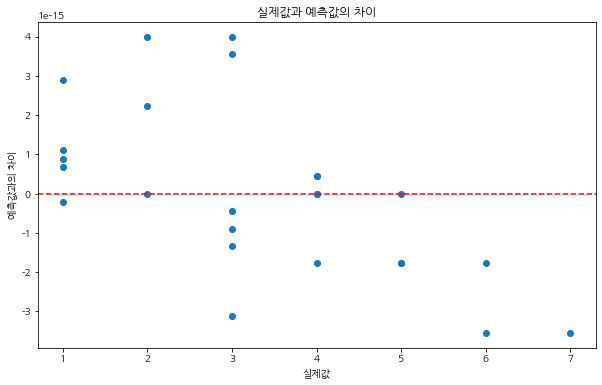

In [59]:
import matplotlib.pyplot as plt

# 실제값
y_true = df1['노인복지시설수']

# 예측값
y_pred = df1['노인복지시설수_예측']

# 차이 계산
residuals = y_true - y_pred

# 차이를 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_true, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('실제값')
plt.ylabel('예측값과의 차이')
plt.title('실제값과 예측값의 차이')
plt.show()

노인복지시설수의 실제값과 예측값의 차이를 시각화
- 각 자치구의 실제값과 예측값 사이의 차이를 산점도로 표시하고, x축 상에 가로선을 그려 예측값과 실제값이 일치하는지 확인

http://data.nsdi.go.kr/dataset/15144

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt

# shp 파일 경로
shp_path = 'LARD_ADM_SECT_SGG_11.shp'

# shp 파일 로드
gdf = gpd.read_file(shp_path, encoding='cp949')

# 예측 결과를 자치구 경계 데이터와 병합
gdf = gdf.merge(df1[['자치구', '노인복지시설수_예측']], on='자치구', how='left')

# 시각화
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='노인복지시설수_예측', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('노인 복지 시설 예측')
plt.show()


KeyError: '자치구'

In [65]:
import geopandas as gpd
import folium

# 자치구 경계 데이터 로드
geojson_path = 'LARD_ADM_SECT_SGG_11.shp'
gdf = gpd.read_file(geojson_path)

# 예측 결과를 자치구 경계 데이터에 병합
gdf = gdf.merge(df1[['자치구', '노인복지시설수_예측']], on='자치구', how='left')

# 지도 생성
m = folium.Map(location=[37.5502, 126.982], zoom_start=11)

# 예측 결과를 지도상에 표시
folium.Choropleth(
    geo_data=gdf,
    name='노인 인프라 예측',
    data=gdf,
    columns=['자치구', '노인복지시설수_예측'],
    key_on='feature.properties.자치구',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='노인 복지 시설 예측',
    highlight=True
).add_to(m)

# 지도 출력
m

KeyError: '자치구'

자치구 경계 데이터를 로드하고, 예측 결과를 자치구 경계 데이터와 병합하여 지도상에 표시
- 각 자치구의 노인 복지 시설 예측값을 색상으로 표현하여 지도를 생성
- 이를 통해 노인 인프라 구축이 부족한 자치구를 시각적으로 확인

In [62]:
import folium
import pandas as pd

# 서울시 자치구 경계 데이터 로드
seoul_geojson = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
seoul_gdf = gpd.read_file(seoul_geojson)

# 자치구별 예측 결과 데이터와 자치구 경계 데이터 병합
merged_data = seoul_gdf.merge(df1[['자치구', '노인복지시설수_예측']], left_on='name', right_on='자치구', how='left')

# 지도 생성
m = folium.Map(location=[37.5502, 126.982], zoom_start=11)

# 예측 결과를 지도상에 표시
folium.Choropleth(
    geo_data=merged_data,
    name='노인 인프라 예측',
    data=merged_data,
    columns=['name', '노인복지시설수_예측'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='노인 복지 시설 예측',
    highlight=True
).add_to(m)

# 지도 출력
m


In [64]:
import folium
import pandas as pd

# 서울시 자치구 경계 데이터 로드
seoul_geojson = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
seoul_gdf = gpd.read_file(seoul_geojson)

# 자치구별 예측 결과 데이터와 자치구 경계 데이터 병합
merged_data = seoul_gdf.merge(df1[['자치구', '노인복지시설수_예측']], left_on='name', right_on='자치구', how='left')

# 지도 생성
m = folium.Map(location=[37.5502, 126.982], zoom_start=11)

# 예측 결과를 지도상에 표시
folium.Choropleth(
    geo_data=merged_data,
    name='노인 인프라 예측',
    data=merged_data,
    columns=['name', '노인복지시설수_예측'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='노인 복지 시설 예측',
    highlight=True
).add_to(m)

# 자치구 이름 표시
for idx, row in merged_data.iterrows():
    centroid = row['geometry'].centroid
    folium.Marker(
        location=[centroid.y, centroid.x],
        tooltip=row['name']
    ).add_to(m)

# 범례 추가
legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 120px; height: 90px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white;
                 ">     
     &nbsp; 예측값 <br>
     &nbsp; 최소값 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; 최대값 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i>
      </div>
     '''

m.get_root().html.add_child(folium.Element(legend_html))

# 지도 출력
m


지도에 자치구 이름을 표시하고, 범례를 추가하여 각 색상이 노인 복지 시설 예측값의 범주를 나타내기
- 자치구 이름은 툴팁으로 표시되며, 범례는 우측 하단에 추가

# 1-6 임의로 예측 모델 실행

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
# '노인인구' 열의 데이터 타입을 문자열로 변환
df1['노인인구'] = df1['노인인구'].astype(str)

# 나머지 열에 대해서도 동일한 작업 수행
df1['양로시설수'] = df1['양로시설수'].astype(str)
df1['양로시설정원'] = df1['양로시설정원'].astype(str)
df1['양로시설현원'] = df1['양로시설현원'].astype(str)
df1['양로시설종사자수'] = df1['양로시설종사자수'].astype(str)
df1['요양시설수'] = df1['요양시설수'].astype(str)
df1['요양시설정원'] = df1['요양시설정원'].astype(str)
df1['요양시설현원'] = df1['요양시설현원'].astype(str)
df1['요양시설종사자수'] = df1['요양시설종사자수'].astype(str)
df1['노인복지시설수'] = df1['노인복지시설수'].astype(str)
df1['노인복지종사자수'] = df1['노인복지종사자수'].astype(str)
df1['경로당'] = df1['경로당'].astype(str)
df1['노인교실'] = df1['노인교실'].astype(str)

In [34]:
# 특성 선택 및 타겟 변수 분리
X = df1[['노인인구', '양로시설수', '양로시설정원', '양로시설현원', '양로시설종사자수',
                    '요양시설수', '요양시설정원', '요양시설현원', '요양시설종사자수',
                    '노인복지시설수', '노인복지종사자수', '경로당', '노인교실']]
y = df1['자치구']

In [35]:
# '노인인구' 열의 쉼표 제거
df1['노인인구'] = df1['노인인구'].str.replace(',', '').astype(float)
df1['양로시설수'] = df1['양로시설수'].str.replace(',', '').astype(float)
df1['양로시설정원'] = df1['양로시설정원'].str.replace(',', '').astype(float)
df1['양로시설현원'] = df1['양로시설현원'].str.replace(',', '').astype(float)
df1['양로시설종사자수'] = df1['양로시설종사자수'].str.replace(',', '').astype(float)
df1['요양시설수'] = df1['요양시설수'].str.replace(',', '').astype(float)
df1['요양시설정원'] = df1['요양시설정원'].str.replace(',', '').astype(float)
df1['요양시설현원'] = df1['요양시설현원'].str.replace(',', '').astype(float)
df1['요양시설종사자수'] = df1['요양시설종사자수'].str.replace(',', '').astype(float)
df1['노인복지시설수'] = df1['노인복지시설수'].str.replace(',', '').astype(float)
df1['노인복지종사자수'] = df1['노인복지종사자수'].str.replace(',', '').astype(float)
df1['경로당'] = df1['경로당'].str.replace(',', '').astype(float)
df1['노인교실'] = df1['노인교실'].str.replace(',', '').astype(float)

# 1) LinearRegression

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# LabelEncoder를 사용하여 자치구를 숫자로 변환
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df1['자치구'])

# 데이터 분할: 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

- 자치구(y)가 문자열로 표현되어 있으므로, 이를 숫자로 인코딩
- 여기서는 LabelEncoder를 사용하여 각 자치구를 고유한 숫자로 매핑
- LabelEncoder를 사용하여 자치구(y)를 숫자로 변환한 후, 특성 선택 및 타겟 변수 분리를 진행

In [37]:
y

array([17,  0,  1, 14,  8,  3, 19,  4, 16, 21, 10, 24,  6, 22, 12, 11, 23,
        9,  2,  5, 18, 13, 15, 20,  7])

In [38]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 사용하여 자치구를 숫자로 변환
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df1['자치구'])

# 원래 자치구와 매핑된 라벨 확인
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'강남구': 0, '강동구': 1, '강북구': 2, '강서구': 3, '관악구': 4, '광진구': 5, '구로구': 6, '금천구': 7, '노원구': 8, '도봉구': 9, '동대문구': 10, '동작구': 11, '마포구': 12, '서대문구': 13, '서초구': 14, '성동구': 15, '성북구': 16, '송파구': 17, '양천구': 18, '영등포구': 19, '용산구': 20, '은평구': 21, '종로구': 22, '중구': 23, '중랑구': 24}


In [39]:
import pandas as pd

# 라벨과 자치구를 매핑하는 데이터프레임 생성
label_df = pd.DataFrame({'자치구': label_encoder.classes_, '라벨': label_encoder.transform(label_encoder.classes_)})
print(label_df)


     자치구  라벨
0    강남구   0
1    강동구   1
2    강북구   2
3    강서구   3
4    관악구   4
5    광진구   5
6    구로구   6
7    금천구   7
8    노원구   8
9    도봉구   9
10  동대문구  10
11   동작구  11
12   마포구  12
13  서대문구  13
14   서초구  14
15   성동구  15
16   성북구  16
17   송파구  17
18   양천구  18
19  영등포구  19
20   용산구  20
21   은평구  21
22   종로구  22
23    중구  23
24   중랑구  24


In [40]:
# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("평균 제곱 오차(MSE): ", mse)
print("결정 계수(R^2): ", r2)

평균 제곱 오차(MSE):  97.73532830399168
결정 계수(R^2):  -8.77353283039917


- 만약 우리가 만든 모델이 샘플 평균으로 모조리 예측한 것보다 안 좋으면 결정계수는 마이너스가 나올 수 있다
- R2 의 문제점은 너무 많은 것에 영향을 받으며, 대표적으로 종속 변수의 분산과 잔차의 분산에 크게 의존하게 된다. 또한, R2 이 모델 적합도를 나타내는 척도라 정의되어 있지만, 단순히 R2 값 만으로는 "모델 선형성" 이나 "종속변수와 독립 변수간의 관계" 또는 "모델적합도"에 대해여 별로 도움이 되지 않는다는 것

# 2) 랜덤 포레스트 

In [41]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 회귀 모델 구축
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(mse)

97.96583999999999


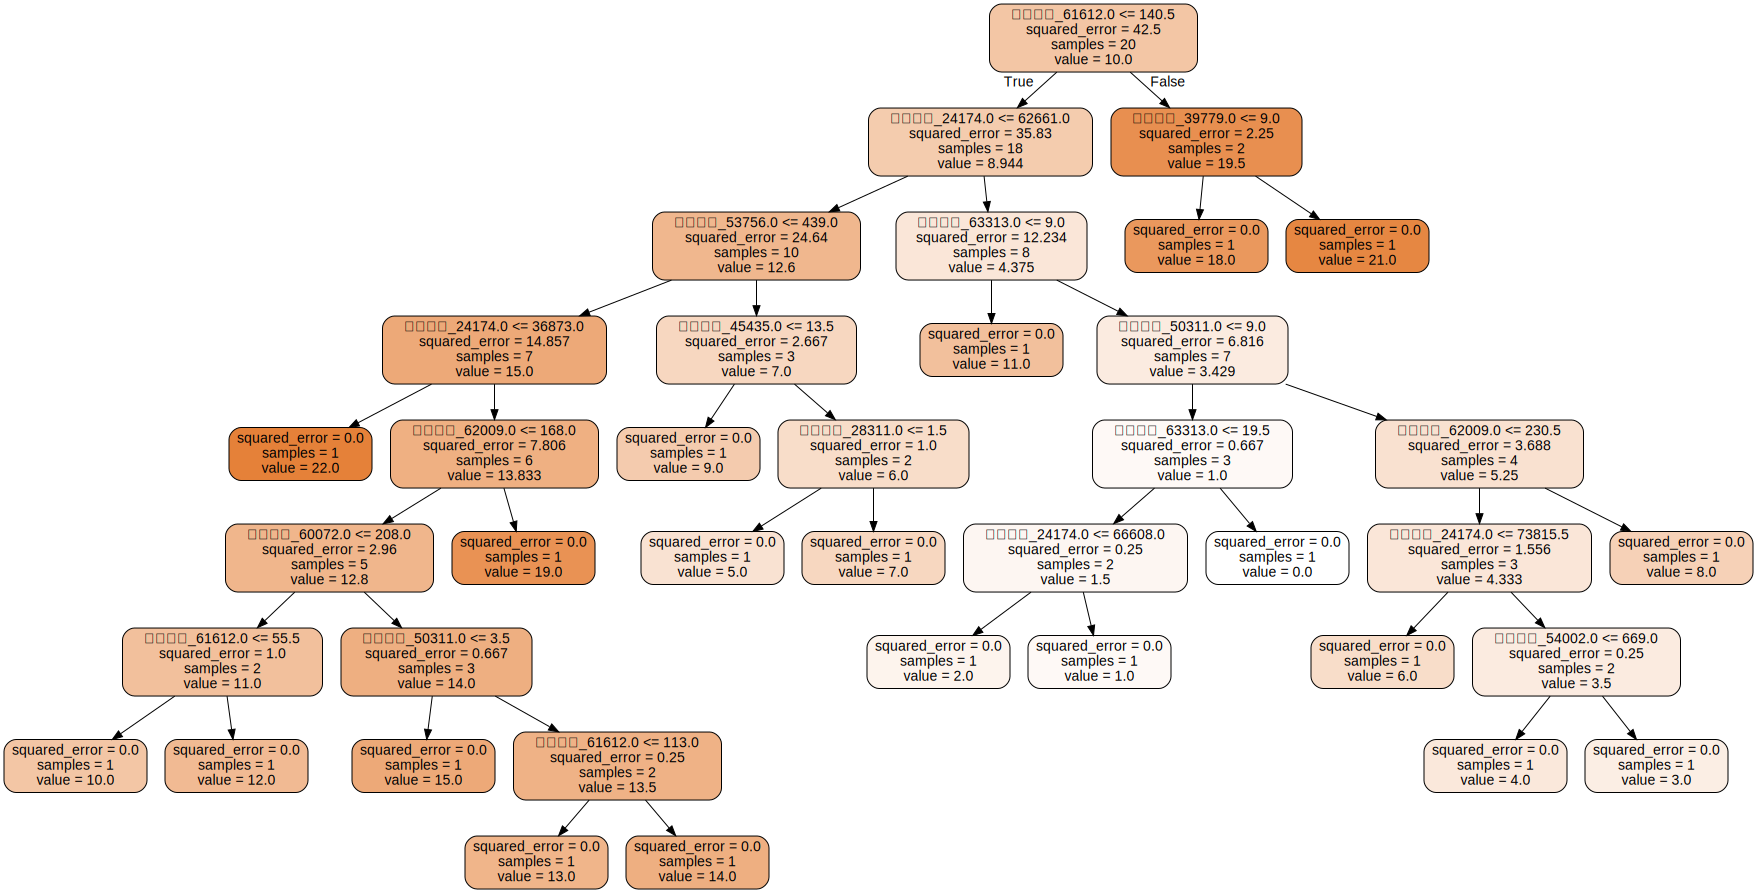

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

# 범주형 변수 인코딩
X_encoded = pd.get_dummies(X, columns=['노인인구', '양로시설수', '양로시설정원', '양로시설현원', '양로시설종사자수',
                    '요양시설수', '요양시설정원', '요양시설현원', '요양시설종사자수',
                    '노인복지시설수', '노인복지종사자수', '경로당', '노인교실'])

# 의사결정 트리 모델 구축
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# 의사결정 트리 시각화
dot_data = export_graphviz(decision_tree_model, out_file=None,
                           feature_names=X_encoded.columns[:13],  # 첫 13개 열에 대해서만 사용
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("Decision_tree")

# 의사결정 트리 출력
graph


# 2. 역별 시간대별 노인 승하차(+지역이름 추가).csv

In [46]:
df2

,호선명,역번호,역명,자치구,승하차구분,승하차,06시간대이전 / 2022-07-01 기준 / 우대권(노인),06-07시간대,07-08시간대,08-09시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후,총인원합
0,1,150,서울역,중구,승차,118173,98,102,216,281,...,688,594,489,308,252,210,128,43,2,7011
1,1,150,서울역,중구,하차,111415,108,286,354,443,...,452,432,305,212,157,131,70,25,7,6777
2,1,151,시청,중구,승차,47686,19,40,39,47,...,324,308,245,136,132,101,70,15,1,3031
3,1,151,시청,중구,하차,46713,80,122,261,314,...,133,122,89,40,23,21,11,3,2,2885
4,1,152,종각,종로구,승차,87092,35,43,34,84,...,560,423,343,242,212,203,156,46,0,5361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,8,2826,수진,성남시,하차,30481,10,59,47,93,...,135,103,96,65,35,37,23,18,3,1632
540,8,2827,모란,성남시,승차,38514,28,43,48,63,...,156,138,111,61,38,37,23,3,0,1622
541,8,2827,모란,성남시,하차,30439,13,50,40,68,...,101,80,76,35,21,17,12,1,5,1252
542,8,2828,남위례,성남시,승차,13952,13,33,58,82,...,69,63,40,21,23,16,15,2,1,933


# 2-1 자치구별로 묶어 승하차 분포 확인

In [47]:
df2_grouped = df2.groupby('자치구')['승하차'].sum().to_frame()

In [48]:
df2_grouped

,승하차
자치구,
강남구,1996330
강동구,1390383
강북구,893142
강서구,934776
관악구,1506223
광진구,1055018
구로구,992277
금천구,242171
노원구,1070692


In [49]:
df2_grouped.shape

(27, 1)

# 2-2 시각화

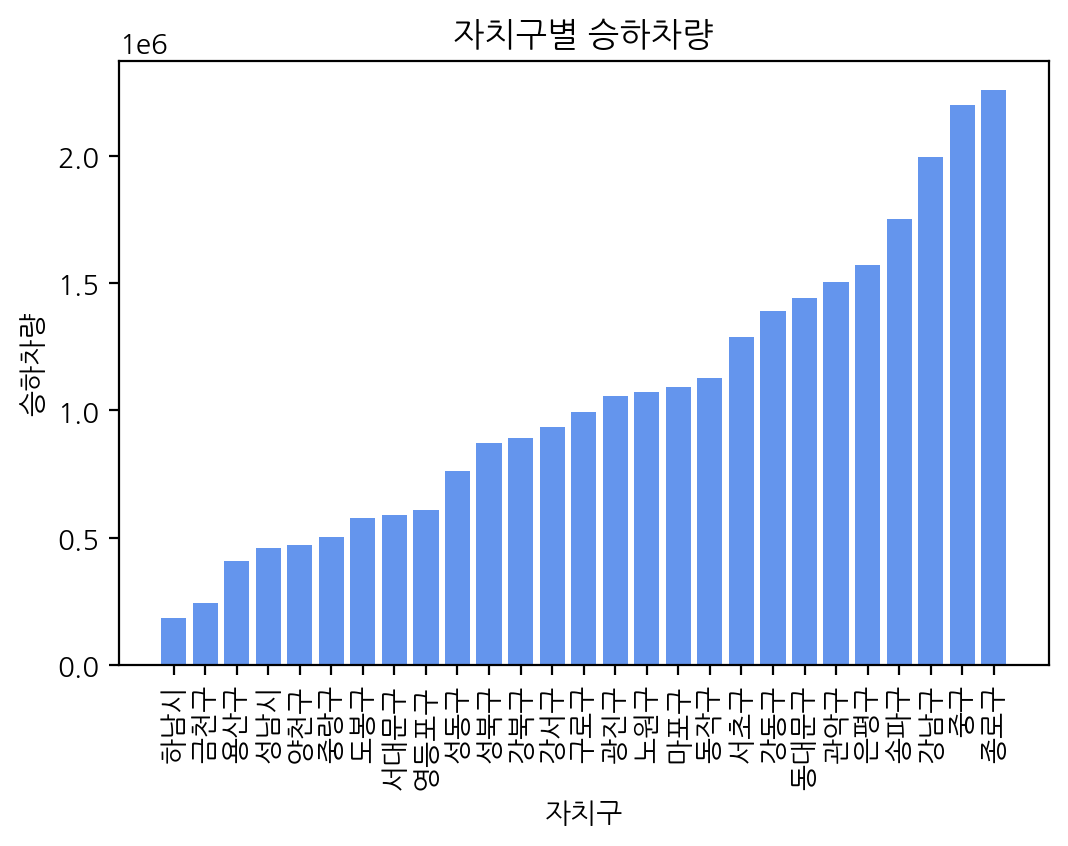

In [50]:
# 데이터프레임(df2_grouped) 준비 후 '승하차' 기준으로 정렬
df2_grouped = df2_grouped.sort_values(by='승하차')

# 막대 그래프를 그리기 위해 데이터를 추출
x = df2_grouped.index  # 자치구
y = df2_grouped['승하차']  # 승하차량

# 그래프 생성
plt.figure(dpi=200)  # 그래프 크기 설정
plt.bar(x, y, color='cornflowerblue')  # 막대 그래프 생성
plt.xlabel('자치구')  # x축 레이블 설정
plt.ylabel('승하차량')  # y축 레이블 설정
plt.title('자치구별 승하차량')  # 그래프 제목 설정

# x축 레이블을 90도로 회전하여 표시 (글자 겹침 방지)
plt.xticks(rotation=90)

# 그래프 출력
plt.show()

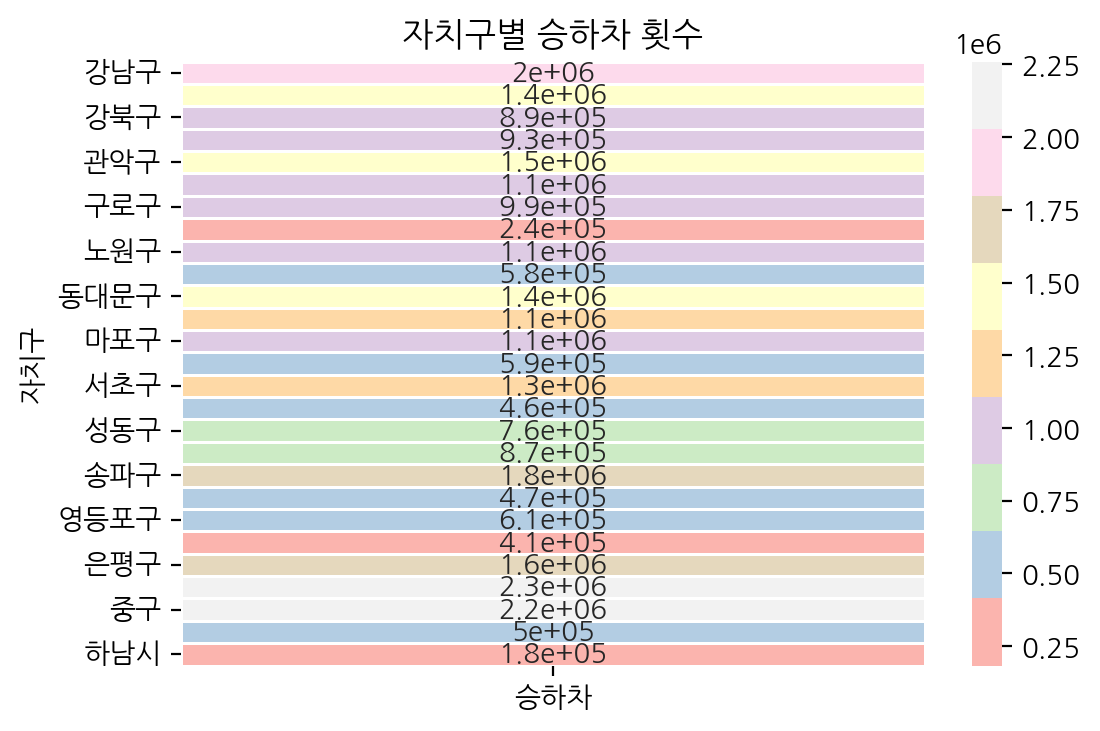

In [51]:
# 피벗 테이블 생성
pivot_table = df2_grouped.pivot_table(index='자치구', values='승하차')


# 히트맵 그리기
plt.figure(dpi=200)
sns.heatmap(pivot_table, annot=True, cmap='Pastel1', linewidths=0.5)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 안 깨지게
plt.rcParams['font.family'] = 'NanumGothic'
plt.title('자치구별 승하차 횟수')
plt.show()